https://colab.research.google.com/drive/1fIUxxjGKf3I5ZszwSjXEGgSwCKAH9aSJ

You can choose to work on any structured dataset.
Recommended dataset would be available at: https://www.kaggle.com/c/GiveMeSomeCredit/data

In [0]:
import pandas as pd
data = pd.read_csv('...') # Path to the file you downloaded

In [0]:
vars = data.columns[1:]

In [0]:
import numpy as np
for t in vars:
  data[t]= np.where(data[t].isnull(),data[t].median(),data[t])

In [0]:
for t in vars:
    x=data[t].quantile(0.95)
    data[t+"outlier_flag"]=np.where(data[t]>x,1,0)
    data[t]=np.where(data[t]>x,x,data[t])

In [0]:
data['Debt_income_ratio_newoutlier']=np.where(data['Debt_income_ratio']>1,1,0)
data['Debt_income_ratio']=np.where(data['Debt_income_ratio']>1,1,data['Debt_income_ratio'])

In [0]:
for t in vars:
  data[t]= data[t]/data[t].max()

In [0]:
X = data.iloc[:,1:]
Y = data['Defaultin2yrs']

In [0]:
print(X.shape, Y.shape)

(150000, 21) (150000,)


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state= 42)

In [0]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(105000, 21) (45000, 21) (105000,) (45000,)


In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [0]:
model = Sequential()
model.add(Dense(1000, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1,  activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1000)              22000     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1001      
Total params: 23,001
Trainable params: 23,001
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=1024, verbose=1)

Train on 105000 samples, validate on 45000 samples
Epoch 1/20
105000/105000 [==============================] - 1s 8us/step - loss: 0.2480 - acc: 0.9296 - val_loss: 0.1830 - val_acc: 0.9382
Epoch 2/20
105000/105000 [==============================] - 1s 6us/step - loss: 0.1826 - acc: 0.9366 - val_loss: 0.1784 - val_acc: 0.9379
Epoch 3/20
105000/105000 [==============================] - 1s 6us/step - loss: 0.1803 - acc: 0.9370 - val_loss: 0.1779 - val_acc: 0.9375
Epoch 4/20
105000/105000 [==============================] - 1s 6us/step - loss: 0.1797 - acc: 0.9369 - val_loss: 0.1781 - val_acc: 0.9376
Epoch 5/20
105000/105000 [==============================] - 1s 6us/step - loss: 0.1792 - acc: 0.9373 - val_loss: 0.1772 - val_acc: 0.9379
Epoch 6/20
105000/105000 [==============================] - 1s 6us/step - loss: 0.1787 - acc: 0.9374 - val_loss: 0.1778 - val_acc: 0.9371
Epoch 7/20
105000/105000 [==============================] - 1s 6us/step - loss: 0.1786 - acc: 0.9373 - val_loss: 0.1773 -

In [0]:
from sklearn.metrics import roc_auc_score

pred = model.predict(X_test)
roc_auc_score(y_test, pred)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


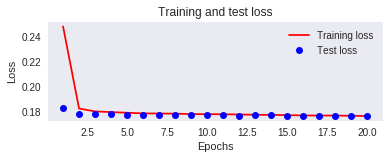

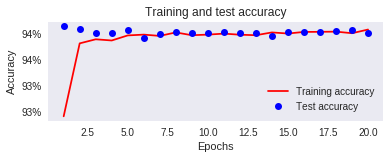

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)

plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'bo', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['acc'], 'r', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'bo', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

In [0]:
pred = model.predict(X_test)
test_data = pd.DataFrame([y_test]).T
test_data['pred']=pred
test_data = test_data.reset_index(drop='index')
test_data = test_data.sort_values(by='pred',ascending=False)
print(test_data[:4500]['Defaultin2yrs'].sum())

1654


In [0]:
model = Sequential()
model.add(Dense(1000, input_dim=21, activation='relu'))
model.add(Dense(2,  activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1000)              22000     
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 2002      
Total params: 24,002
Trainable params: 24,002
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
from keras.utils import to_categorical

In [0]:
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

In [0]:
y_test[:,1]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [0]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=1024, verbose=1,class_weight = {0:1,1:100})

Train on 105000 samples, validate on 45000 samples
Epoch 1/20
105000/105000 [==============================] - 1s 9us/step - loss: 2.2961 - acc: 0.1186 - val_loss: 1.4042 - val_acc: 0.2003
Epoch 2/20
105000/105000 [==============================] - 1s 7us/step - loss: 2.0490 - acc: 0.2966 - val_loss: 1.1834 - val_acc: 0.3958
Epoch 3/20
105000/105000 [==============================] - 1s 7us/step - loss: 2.0340 - acc: 0.3327 - val_loss: 1.3146 - val_acc: 0.3263
Epoch 4/20
105000/105000 [==============================] - 1s 7us/step - loss: 2.0263 - acc: 0.3307 - val_loss: 1.3034 - val_acc: 0.3461
Epoch 5/20
105000/105000 [==============================] - 1s 7us/step - loss: 2.0174 - acc: 0.3466 - val_loss: 1.3440 - val_acc: 0.3250
Epoch 6/20
105000/105000 [==============================] - 1s 7us/step - loss: 2.0169 - acc: 0.3470 - val_loss: 1.2937 - val_acc: 0.3377
Epoch 7/20
105000/105000 [==============================] - 1s 7us/step - loss: 2.0158 - acc: 0.3523 - val_loss: 1.2024 -

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


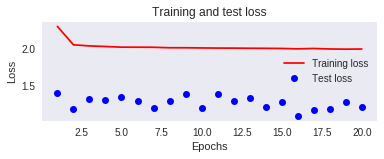

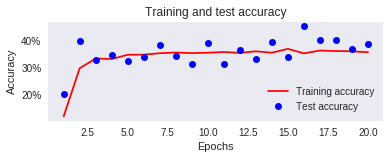

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)

plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'bo', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['acc'], 'r', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'bo', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

In [0]:
pred = model.predict(X_test)
test_data = pd.DataFrame([y_test[:,1]]).T
test_data['pred']=pred[:,1]
test_data = test_data.reset_index(drop='index')
test_data = test_data.sort_values(by='pred',ascending=False)
test_data.columns = ['Defaultin2yrs','pred']
print(test_data[:4500]['Defaultin2yrs'].sum())

1657.0


In [0]:
from sklearn.metrics import roc_auc_score

pred = model.predict(X_test)
roc_auc_score(y_test, pred)

0.8645550496887069